In [56]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [57]:
header = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
data_file_path = Path(r'C:\Users\tibol\Desktop\FIIW Tibo Laperre\fase 5 - thesis\thesis-projectV3\data\input\datasets\nursery\original_dataset\nursery.data')
df = pd.read_csv(data_file_path, header=None, names=header, delimiter=',')
df

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [58]:
# Assuming you have a DataFrame named 'df'
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}\nUnique values: {unique_values}\n')


Column: parents
Unique values: ['usual' 'pretentious' 'great_pret']

Column: has_nurs
Unique values: ['proper' 'less_proper' 'improper' 'critical' 'very_crit']

Column: form
Unique values: ['complete' 'completed' 'incomplete' 'foster']

Column: children
Unique values: ['1' '2' '3' 'more']

Column: housing
Unique values: ['convenient' 'less_conv' 'critical']

Column: finance
Unique values: ['convenient' 'inconv']

Column: social
Unique values: ['nonprob' 'slightly_prob' 'problematic']

Column: health
Unique values: ['recommended' 'priority' 'not_recom']

Column: class
Unique values: ['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior']



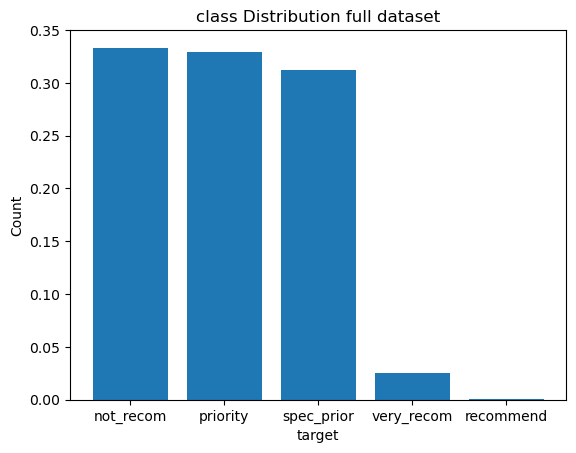

In [59]:
# Plot a bar plot of the 'class' column
class_counts = df['class'].value_counts(normalize=True)
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('class Distribution full dataset')
plt.show()

In [60]:
df = df.drop(df[df['class'] == 'recommend'].index)
df

,parents,has_nurs,form,children,housing,finance,social,health,class
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [62]:
path_to_save = data_file_path.parent.parent / 'nursery.csv'
df.to_csv(path_to_save, index=None, sep=';')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

cat = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']

df = pd.get_dummies(df, columns=cat)

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



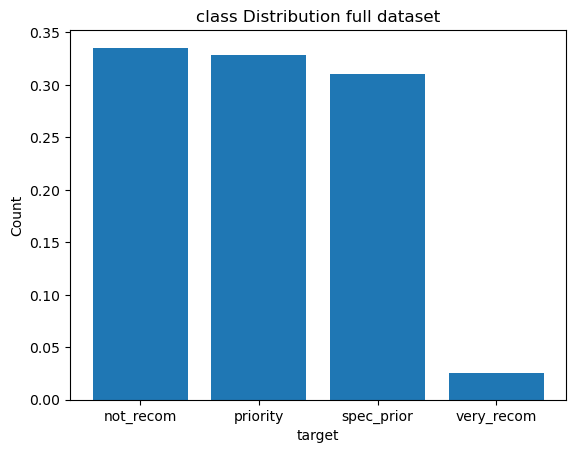

In [48]:
# Plot a bar plot of the 'class' column
class_counts = y_train.value_counts(normalize=True)
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('class Distribution full dataset')
plt.show()

In [49]:
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       842
    priority       0.98      0.99      0.98       858
  spec_prior       0.99      1.00      0.99       829
  very_recom       1.00      0.70      0.82        63

    accuracy                           0.99      2592
   macro avg       0.99      0.92      0.95      2592
weighted avg       0.99      0.99      0.99      2592

